In [1]:
import autokeras as ak
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import pandas as pd

# CSV 파일에서 변동이 적용된 데이터 읽어오기
data_with_volatility = pd.read_csv('power_consumption_data_with_volatility.csv', parse_dates=['Date'], index_col='Date')

# Feature와 Target 분리
X = data_with_volatility.iloc[:-1].values  # 마지막 데이터는 예측 대상이므로 제외
y = data_with_volatility['Consumption'].shift(-1).dropna().values

# Train-test 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Autokeras 모델 정의
regressor = ak.StructuredDataRegressor(max_trials=10)  # max_trials는 조정 가능

# 모델 훈련
regressor.fit(X_train, y_train, epochs=20)

# 테스트 데이터로 예측
predictions = regressor.predict(X_test)

# 평가
mse = mean_squared_error(y_test, predictions)
print(f'Mean Squared Error on Test Data: {mse}')

# 이후의 데이터 예측
future_data = data_with_volatility.iloc[-1:].values  # 마지막 데이터
future_prediction = regressor.predict(future_data)
print(f'Predicted Consumption for the Future: {future_prediction[0]} Kwh')

Trial 10 Complete [00h 00m 01s]
val_loss: 68509520.0

Best val_loss So Far: 18069444.0
Total elapsed time: 00h 00m 14s


Epoch 1/20
28/28 [==============================] - 0s 801us/step - loss: 92452448.0000 - mean_squared_error: 92452448.0000
Epoch 2/20
28/28 [==============================] - 0s 764us/step - loss: 92395568.0000 - mean_squared_error: 92395568.0000
Epoch 3/20
28/28 [==============================] - 0s 753us/step - loss: 92232224.0000 - mean_squared_error: 92232224.0000
Epoch 4/20
28/28 [==============================] - 0s 674us/step - loss: 91857328.0000 - mean_squared_error: 91857328.0000
Epoch 5/20
28/28 [==============================] - 0s 655us/step - loss: 91124112.0000 - mean_squared_error: 91124112.0000
Epoch 6/20
28/28 [==============================] - 0s 658us/step - loss: 89945544.0000 - mean_squared_error: 89945544.0000
Epoch 7/20
28/28 [==============================] - 0s 659us/step - loss: 88179584.0000 - mean_squared_error: 88179584.0000
Epoch 8/20
28/28 [==============================] - 0s 692us/step - loss: 85890888.0000 - mean_squared_error: 85890888.0000
Epoch 9/

INFO:tensorflow:Assets written to: ./structured_data_regressor/best_model/assets


7/7 [==============================] - 0s 612us/step
Mean Squared Error on Test Data: 15233730.336751744


1/1 [==============================] - 0s 2ms/step
Predicted Consumption for the Future: [5270.929] Kwh


Reloading Tuner from ./structured_data_regressor/tuner0.json


Epoch 1/20
35/35 [==============================] - 0s 792us/step - loss: 91856696.0000 - mean_squared_error: 91856696.0000
Epoch 2/20
35/35 [==============================] - 0s 744us/step - loss: 91800176.0000 - mean_squared_error: 91800176.0000
Epoch 3/20
35/35 [==============================] - 0s 692us/step - loss: 91598904.0000 - mean_squared_error: 91598904.0000
Epoch 4/20
35/35 [==============================] - 0s 653us/step - loss: 91082456.0000 - mean_squared_error: 91082456.0000
Epoch 5/20
35/35 [==============================] - 0s 687us/step - loss: 90009984.0000 - mean_squared_error: 90009984.0000
Epoch 6/20
35/35 [==============================] - 0s 649us/step - loss: 88083008.0000 - mean_squared_error: 88083008.0000
Epoch 7/20
35/35 [==============================] - 0s 635us/step - loss: 85145216.0000 - mean_squared_error: 85145216.0000
Epoch 8/20
35/35 [==============================] - 0s 647us/step - loss: 80770256.0000 - mean_squared_error: 80770256.0000
Epoch 9/

INFO:tensorflow:Assets written to: ./structured_data_regressor/best_model/assets


12/12 [==============================] - 0s 577us/step
          Date  Predicted Consumption
0   2024-01-01            7780.422852
1   2024-01-02            7780.422852
2   2024-01-03            7780.422852
3   2024-01-04            7780.422852
4   2024-01-05            7780.422852
..         ...                    ...
360 2024-12-26            7780.422852
361 2024-12-27            7780.422852
362 2024-12-28            7780.422852
363 2024-12-29            7780.422852
364 2024-12-30            7780.422852

[365 rows x 2 columns]


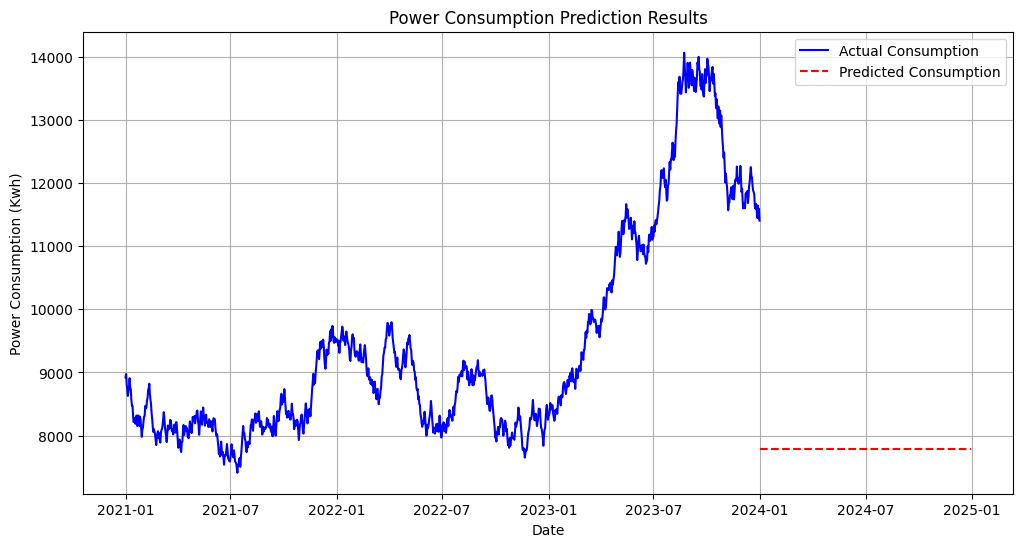

In [4]:
import autokeras as ak
import numpy as np
import pandas as pd
from datetime import datetime, timedelta
import matplotlib.pyplot as plt

# Load the data
data_with_volatility = pd.read_csv('power_consumption_data_with_volatility.csv', parse_dates=['Date'], index_col='Date')

# Feature and Target separation
X = data_with_volatility.iloc[:-1].values
y = data_with_volatility['Consumption'].shift(-1).dropna().values

# Autokeras model definition
regressor = ak.StructuredDataRegressor(max_trials=10)

# Model training
regressor.fit(X, y, epochs=20)

# Define the future prediction period
future_prediction_period = 365

# Generate future dates
start_date = data_with_volatility.index[-1] + timedelta(days=1)
future_dates = [start_date + timedelta(days=i) for i in range(future_prediction_period)]

# Repeat the last data point for the future prediction period
future_data = np.array([data_with_volatility.iloc[-1].values] * future_prediction_period)

# Predict future values
future_predictions = regressor.predict(future_data)

# Reshape the predictions array
future_predictions = future_predictions.reshape(-1)

# Create a DataFrame with the predicted values and dates
future_result = pd.DataFrame({'Date': future_dates, 'Predicted Consumption': future_predictions})

# Print and visualize the future result
print(future_result)

# Visualization of the predicted consumption
plt.figure(figsize=(12, 6))
plt.plot(data_with_volatility.index, data_with_volatility['Consumption'], label='Actual Consumption', color='blue')
plt.plot(future_result['Date'], future_result['Predicted Consumption'], label='Predicted Consumption', color='red', linestyle='dashed')
plt.title('Power Consumption Prediction Results')
plt.xlabel('Date')
plt.ylabel('Power Consumption (Kwh)')
plt.legend()
plt.grid(True)
plt.show()


Reloading Tuner from ./structured_data_regressor/tuner0.json


Epoch 1/20
35/35 [==============================] - 0s 804us/step - loss: 91861872.0000 - mean_squared_error: 91861872.0000
Epoch 2/20
35/35 [==============================] - 0s 785us/step - loss: 91829112.0000 - mean_squared_error: 91829112.0000
Epoch 3/20
35/35 [==============================] - 0s 747us/step - loss: 91717984.0000 - mean_squared_error: 91717984.0000
Epoch 4/20
35/35 [==============================] - 0s 673us/step - loss: 91396992.0000 - mean_squared_error: 91396992.0000
Epoch 5/20
35/35 [==============================] - 0s 682us/step - loss: 90705432.0000 - mean_squared_error: 90705432.0000
Epoch 6/20
35/35 [==============================] - 0s 681us/step - loss: 89418824.0000 - mean_squared_error: 89418824.0000
Epoch 7/20
35/35 [==============================] - 0s 686us/step - loss: 87469808.0000 - mean_squared_error: 87469808.0000
Epoch 8/20
35/35 [==============================] - 0s 676us/step - loss: 84621896.0000 - mean_squared_error: 84621896.0000
Epoch 9/

INFO:tensorflow:Assets written to: ./structured_data_regressor/best_model/assets


1/1 [==============================] - 0s 2ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 2ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 2ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 2ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 2ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 2ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 2ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 2ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 2ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 2ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 2ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 2ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 2ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 2ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 2ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 2ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 2ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 2ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 2ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 2ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 2ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 2ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 2ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 2ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 2ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 2ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 2ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 2ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 2ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 2ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 2ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 2ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 2ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 2ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 2ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 2ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 2ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 2ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 2ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 2ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 2ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 2ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 2ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 2ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 2ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 2ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 2ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 2ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 2ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 2ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 2ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 2ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 2ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 2ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 2ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 2ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 2ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 2ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 2ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 2ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 5ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 2ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 2ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 2ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 2ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 2ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 2ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 2ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 2ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 2ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 2ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 2ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 2ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 2ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 2ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 2ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 2ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 2ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 2ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 2ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 2ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 2ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 2ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 2ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 2ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 2ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 2ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 2ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 2ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 2ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 2ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 2ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 2ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 2ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 2ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 2ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 2ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 2ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 2ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 2ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 2ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 2ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 2ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 2ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 2ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 2ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 2ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 2ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 2ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 2ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 2ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 2ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 2ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 2ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 3ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 2ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 2ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 2ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 2ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 3ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 2ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 2ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 2ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 2ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 2ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 2ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 2ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 2ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 2ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 2ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 2ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 2ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 2ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 2ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 2ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 2ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 2ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 2ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 2ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 2ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 2ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 2ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 2ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 2ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 2ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 2ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 4ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 2ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 2ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 2ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 2ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 2ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 2ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 2ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 2ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 2ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 2ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 2ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 4ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 2ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 2ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 2ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 2ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 2ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 2ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 2ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 2ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 2ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 2ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 2ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 2ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 2ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 2ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 3ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 2ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 2ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 2ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 3ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 3ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 2ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 2ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 2ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 2ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 3ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 2ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 2ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 2ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 2ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 2ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 2ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 2ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 2ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 3ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 2ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 2ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 2ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 2ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 2ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 2ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 2ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 2ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 2ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 2ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 2ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 2ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 2ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 2ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 2ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 2ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 2ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 2ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 2ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 2ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 2ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 2ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 2ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 4ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 2ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 2ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 2ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 2ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 2ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 2ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 2ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 2ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 2ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 2ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 2ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 2ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 2ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 2ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 2ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 2ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 2ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 2ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 2ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 2ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 2ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 2ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 2ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 2ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 2ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 2ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 2ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 2ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 2ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 2ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 2ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 2ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 2ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 2ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 2ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 2ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 2ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 2ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 2ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 2ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 2ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 2ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 2ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 2ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 2ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 2ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 2ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 2ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 2ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 2ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 2ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 2ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 2ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 2ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 2ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 2ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 2ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 2ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 2ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 2ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 2ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 2ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 2ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 2ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 2ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 2ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 2ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 2ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 2ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 2ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 2ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 2ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 2ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 2ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 2ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 2ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 2ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 2ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 2ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 2ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 2ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 2ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 2ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 2ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 2ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 2ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 2ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 2ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 3ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 2ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 2ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 2ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 2ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 2ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 2ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 2ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 2ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 2ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 2ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 2ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 2ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 2ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 2ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 2ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 2ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 2ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 2ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 2ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 2ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 2ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 2ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 2ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 2ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 2ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 2ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 2ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 2ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 2ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 2ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 2ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 2ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 2ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 2ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 2ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 2ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 2ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 2ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 2ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 2ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 2ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 2ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 2ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 2ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 2ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 2ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 2ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 2ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 2ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 2ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 2ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 2ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 2ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 2ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 2ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 2ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 2ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 2ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 2ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/908976465.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


          Date  Predicted Consumption
0   2024-01-01            6681.368164
1   2024-01-02            6969.946289
2   2024-01-03            6952.309570
3   2024-01-04            6953.387695
4   2024-01-05            6953.322266
..         ...                    ...
360 2024-12-26            6953.325684
361 2024-12-27            6953.325684
362 2024-12-28            6953.325684
363 2024-12-29            6953.325684
364 2024-12-30            6953.325684

[365 rows x 2 columns]


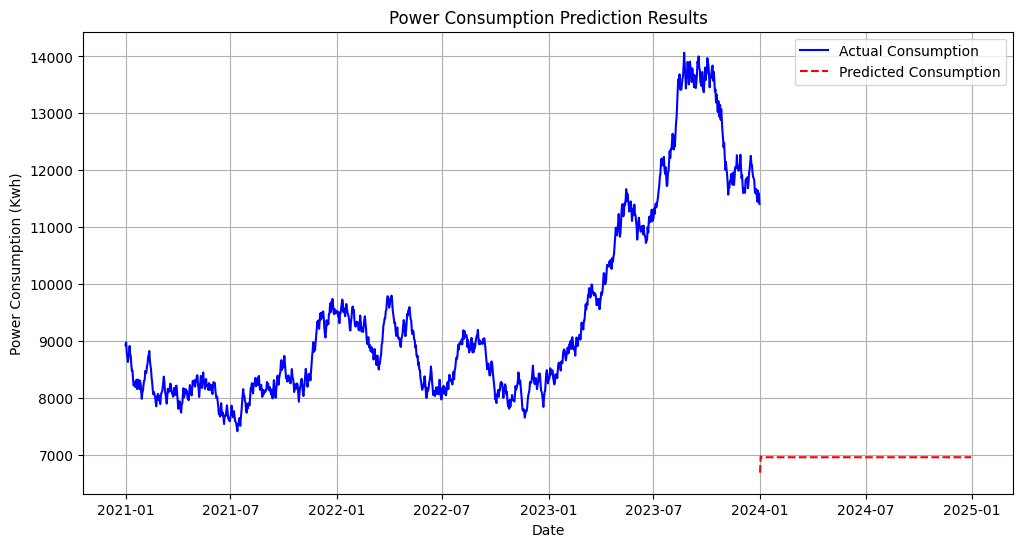

In [6]:
import autokeras as ak
import numpy as np
import pandas as pd
from datetime import datetime, timedelta
import matplotlib.pyplot as plt

# Load the data
data_with_volatility = pd.read_csv('power_consumption_data_with_volatility.csv', parse_dates=['Date'], index_col='Date')

# Feature and Target separation
X = data_with_volatility.iloc[:-1].values
y = data_with_volatility['Consumption'].shift(-1).dropna().values

# Autokeras model definition
regressor = ak.StructuredDataRegressor(max_trials=10)

# Model training
regressor.fit(X, y, epochs=20)

# Define the future prediction period
future_prediction_period = 365

# Generate future dates
start_date = data_with_volatility.index[-1] + timedelta(days=1)
future_dates = [start_date + timedelta(days=i) for i in range(future_prediction_period)]

# Initialize an empty array for predictions
future_predictions = np.zeros(future_prediction_period)

# Use the last known data point to make sequential predictions for each day
current_data = np.array([data_with_volatility.iloc[-1].values])
for i in range(future_prediction_period):
    prediction = regressor.predict(current_data)
    future_predictions[i] = prediction[0]
    current_data[0, -1] = prediction  # Update the last value for the next prediction

# Create a DataFrame with the predicted values and dates
future_result = pd.DataFrame({'Date': future_dates, 'Predicted Consumption': future_predictions})

# Print and visualize the future result
print(future_result)

# Visualization of the predicted consumption
plt.figure(figsize=(12, 6))
plt.plot(data_with_volatility.index, data_with_volatility['Consumption'], label='Actual Consumption', color='blue')
plt.plot(future_result['Date'], future_result['Predicted Consumption'], label='Predicted Consumption', color='red', linestyle='dashed')
plt.title('Power Consumption Prediction Results')
plt.xlabel('Date')
plt.ylabel('Power Consumption (Kwh)')
plt.legend()
plt.grid(True)
plt.show()


Reloading Tuner from ./structured_data_regressor/tuner0.json


Epoch 1/20
35/35 [==============================] - 0s 856us/step - loss: 91855728.0000 - mean_squared_error: 91855728.0000
Epoch 2/20
35/35 [==============================] - 0s 822us/step - loss: 91797184.0000 - mean_squared_error: 91797184.0000
Epoch 3/20
35/35 [==============================] - 0s 758us/step - loss: 91589744.0000 - mean_squared_error: 91589744.0000
Epoch 4/20
35/35 [==============================] - 0s 712us/step - loss: 91060640.0000 - mean_squared_error: 91060640.0000
Epoch 5/20
35/35 [==============================] - 0s 677us/step - loss: 89984336.0000 - mean_squared_error: 89984336.0000
Epoch 6/20
35/35 [==============================] - 0s 723us/step - loss: 87987104.0000 - mean_squared_error: 87987104.0000
Epoch 7/20
35/35 [==============================] - 0s 686us/step - loss: 85036016.0000 - mean_squared_error: 85036016.0000
Epoch 8/20
35/35 [==============================] - 0s 729us/step - loss: 80835384.0000 - mean_squared_error: 80835384.0000
Epoch 9/

INFO:tensorflow:Assets written to: ./structured_data_regressor/best_model/assets


1/1 [==============================] - 0s 2ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 2ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 2ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 2ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 2ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 2ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 2ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 2ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 2ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 2ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 2ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 2ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 3ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 2ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 2ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 2ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 2ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 2ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 2ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 2ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 2ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 2ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 2ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 2ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 2ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 2ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 2ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 2ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 2ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 2ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 2ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 2ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 2ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 2ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 2ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 2ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 2ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 2ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 2ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 2ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 2ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 2ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 2ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 2ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 2ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 2ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 2ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 2ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 2ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 2ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 2ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 2ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 2ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 2ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 2ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 2ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 2ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 2ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 2ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 2ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 2ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 2ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 2ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 2ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 2ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 2ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 2ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 2ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 2ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 2ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 2ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 2ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 2ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 2ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 2ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 2ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 3ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 2ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 2ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 2ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 2ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 2ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 2ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 2ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 2ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 2ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 2ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 2ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 2ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 2ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 2ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 3ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 2ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 2ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 2ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 2ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 2ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 2ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 2ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 2ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 2ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 2ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 2ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 5ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 2ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 2ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 2ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 2ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 2ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 2ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 2ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 2ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 2ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 2ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 2ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 2ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 2ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 2ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 2ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 2ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 2ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 2ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 2ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 2ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 2ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 2ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 2ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 2ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 2ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 2ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 2ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 2ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 2ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 2ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 2ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 2ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 2ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 2ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 2ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 2ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 3ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 2ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 2ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 2ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 2ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 2ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 2ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 2ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 2ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 2ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 2ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 2ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 2ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 2ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 2ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 2ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 2ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 2ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 2ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 2ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 2ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 2ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 2ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 2ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 2ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 2ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 2ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 2ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 2ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 2ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 2ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 2ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 2ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 2ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 2ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 2ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 2ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 2ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 2ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 2ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 2ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 2ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 2ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 2ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 2ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 2ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 2ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 2ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 2ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 2ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 2ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 2ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 2ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 2ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 2ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 2ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 2ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 2ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 2ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 2ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 2ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 2ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 2ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 2ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 2ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 2ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 2ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 2ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 2ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 2ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 2ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 5ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 2ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 2ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 2ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 2ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 2ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 2ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 2ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 2ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 2ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 2ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 4ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 2ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 2ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 2ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 2ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 2ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 2ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 2ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 2ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 2ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 2ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 2ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 2ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 2ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 2ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 2ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 2ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 2ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 2ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 2ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 2ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 2ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 3ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 2ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 2ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 2ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 2ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 2ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 2ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 2ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 2ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 2ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 2ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 2ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 2ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 2ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 2ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 2ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 2ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 2ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 2ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 2ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 2ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 2ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 2ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 2ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 2ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 4ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 2ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 2ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 2ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 2ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 2ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 2ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 2ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 2ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 2ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 2ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 2ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 2ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 2ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 2ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 2ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 2ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 2ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 2ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 2ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 2ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 2ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 2ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 2ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 2ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 2ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 2ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 2ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 2ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 2ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 57ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 2ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 2ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 2ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 2ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 2ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 2ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 2ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 2ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 2ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 2ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 2ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 2ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 2ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 2ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 2ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 2ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 2ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 2ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 2ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 2ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 2ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 2ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 2ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 2ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 2ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 2ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 2ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 2ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 2ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 2ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 2ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 2ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 2ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 2ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 2ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 2ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 2ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 2ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 2ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 2ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 2ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 2ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 2ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 2ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 2ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 2ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 2ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 2ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 2ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 2ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 2ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 2ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 2ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 2ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 2ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 2ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 2ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 2ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 2ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 2ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 2ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 2ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 2ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 2ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


1/1 [==============================] - 0s 2ms/step


/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_predictions[i] = prediction[0]
/var/folders/77/0y3c2dn532nds0ds6qrpn4cw0000gn/T/ipykernel_65131/3802688232.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_data[0, -1] = prediction  # Update the last value for the next prediction


          Date  Predicted Consumption
0   2024-01-01            7770.709961
1   2024-01-02            7971.085938
2   2024-01-03            7960.038574
3   2024-01-04            7960.646973
4   2024-01-05            7960.613770
..         ...                    ...
360 2024-12-26            7960.615723
361 2024-12-27            7960.616211
362 2024-12-28            7960.615723
363 2024-12-29            7960.616211
364 2024-12-30            7960.615723

[365 rows x 2 columns]


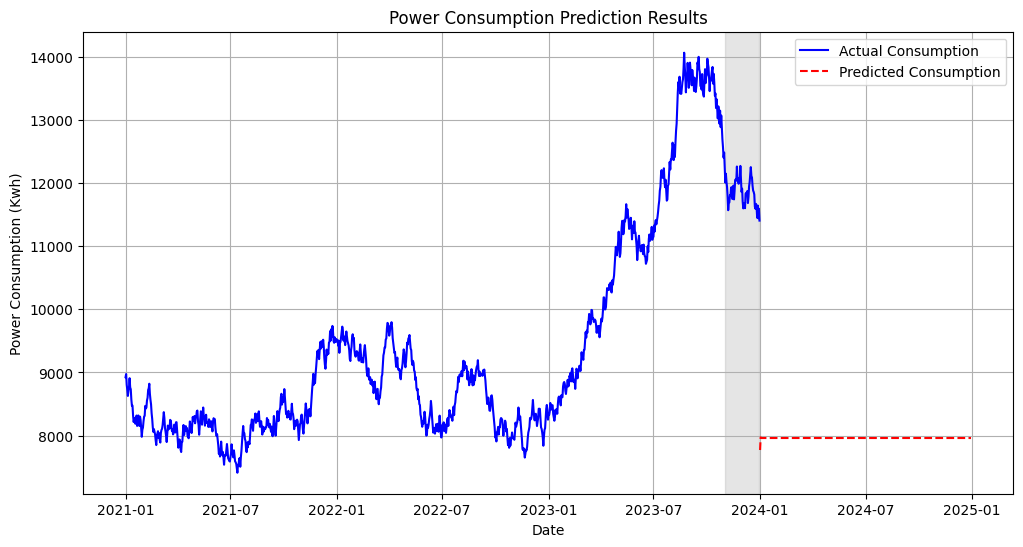

In [8]:
import autokeras as ak
import numpy as np
import pandas as pd
from datetime import datetime, timedelta
import matplotlib.pyplot as plt

# Load the data
data_with_volatility = pd.read_csv('power_consumption_data_with_volatility.csv', parse_dates=['Date'], index_col='Date')

# Feature and Target separation
X = data_with_volatility.iloc[:-1].values
y = data_with_volatility['Consumption'].shift(-1).dropna().values

# Autokeras model definition
regressor = ak.StructuredDataRegressor(max_trials=10)

# Model training
regressor.fit(X, y, epochs=20)

# Define the future prediction period
future_prediction_period = 365

# Generate future dates
start_date = data_with_volatility.index[-1] + timedelta(days=1)
future_dates = [start_date + timedelta(days=i) for i in range(future_prediction_period)]

# Initialize an empty array for predictions
future_predictions = np.zeros(future_prediction_period)

# Use the last known data point to make sequential predictions for each day
current_data = np.array([data_with_volatility.iloc[-1].values])
for i in range(future_prediction_period):
    prediction = regressor.predict(current_data)
    future_predictions[i] = prediction[0]
    current_data[0, -1] = prediction  # Update the last value for the next prediction

# Create a DataFrame with the predicted values and dates
future_result = pd.DataFrame({'Date': future_dates, 'Predicted Consumption': future_predictions})

# Print and visualize the future result
print(future_result)

# Visualize the predicted consumption for the last 2 months
plt.figure(figsize=(12, 6))
plt.plot(data_with_volatility.index, data_with_volatility['Consumption'], label='Actual Consumption', color='blue')
plt.plot(future_result['Date'], future_result['Predicted Consumption'], label='Predicted Consumption', color='red', linestyle='dashed')
plt.title('Power Consumption Prediction Results')
plt.xlabel('Date')
plt.ylabel('Power Consumption (Kwh)')
plt.legend()
plt.grid(True)

# Highlight the last 2 months
last_two_months_start = data_with_volatility.index[-60]  # Assuming daily data
plt.axvspan(last_two_months_start, data_with_volatility.index[-1], alpha=0.2, color='gray')

plt.show()


In [10]:
import autokeras as ak
import numpy as np
import pandas as pd
from datetime import datetime, timedelta
import matplotlib.pyplot as plt

# Load the data
data_with_volatility = pd.read_csv('power_consumption_data_with_volatility.csv', parse_dates=['Date'], index_col='Date')

# Feature and Target separation
X = data_with_volatility.iloc[:-1].values
y = data_with_volatility['Consumption'].shift(-1).dropna().values

# Autokeras model definition
regressor = ak.StructuredDataRegressor(max_trials=10)

# Model training
regressor.fit(X[:-60], y[:-60], epochs=20)  # Use all data except the last 60 days for training

# Get the last 60 days of the data for testing
X_test = data_with_volatility.iloc[-60:].values

# Predictions for the last 60 days
predictions_test = regressor.predict(X_test)

# Create a DataFrame with the actual and predicted values for the last 60 days
test_result = pd.DataFrame({'Date': data_with_volatility.index[-60:], 'Actual Consumption': data_with_volatility['Consumption'][-60:], 'Predicted Consumption': predictions_test})

# Print the actual and predicted values for the last 60 days
print(test_result)

# Visualize the predicted consumption for the last 60 days
plt.figure(figsize=(12, 6))
plt.plot(data_with_volatility.index, data_with_volatility['Consumption'], label='Actual Consumption', color='blue')
plt.plot(test_result['Date'], test_result['Predicted Consumption'], label='Predicted Consumption (Test)', color='red', linestyle='dashed')
plt.title('Power Consumption Prediction Results (Test)')
plt.xlabel('Date')
plt.ylabel('Power Consumption (Kwh)')
plt.legend()
plt.grid(True)
plt.show()


Reloading Tuner from ./structured_data_regressor/tuner0.json


Epoch 1/20
33/33 [==============================] - 0s 866us/step - loss: 89026936.0000 - mean_squared_error: 89026936.0000
Epoch 2/20
33/33 [==============================] - 0s 837us/step - loss: 88971144.0000 - mean_squared_error: 88971144.0000
Epoch 3/20
33/33 [==============================] - 0s 787us/step - loss: 88793472.0000 - mean_squared_error: 88793472.0000
Epoch 4/20
33/33 [==============================] - 0s 704us/step - loss: 88367272.0000 - mean_squared_error: 88367272.0000
Epoch 5/20
33/33 [==============================] - 0s 703us/step - loss: 87476680.0000 - mean_squared_error: 87476680.0000
Epoch 6/20
33/33 [==============================] - 0s 688us/step - loss: 85948992.0000 - mean_squared_error: 85948992.0000
Epoch 7/20
33/33 [==============================] - 0s 683us/step - loss: 83614080.0000 - mean_squared_error: 83614080.0000
Epoch 8/20
33/33 [==============================] - 0s 719us/step - loss: 80152720.0000 - mean_squared_error: 80152720.0000
Epoch 9/

INFO:tensorflow:Assets written to: ./structured_data_regressor/best_model/assets


2/2 [==============================] - 0s 1ms/step


ValueError: Per-column arrays must each be 1-dimensional

Reloading Tuner from ./structured_data_regressor/tuner0.json


Epoch 1/20
33/33 [==============================] - 0s 822us/step - loss: 89030176.0000 - mean_squared_error: 89030176.0000
Epoch 2/20
33/33 [==============================] - 0s 788us/step - loss: 88981536.0000 - mean_squared_error: 88981536.0000
Epoch 3/20
33/33 [==============================] - 0s 774us/step - loss: 88828504.0000 - mean_squared_error: 88828504.0000
Epoch 4/20
33/33 [==============================] - 0s 688us/step - loss: 88431104.0000 - mean_squared_error: 88431104.0000
Epoch 5/20
33/33 [==============================] - 0s 713us/step - loss: 87624280.0000 - mean_squared_error: 87624280.0000
Epoch 6/20
33/33 [==============================] - 0s 674us/step - loss: 86234536.0000 - mean_squared_error: 86234536.0000
Epoch 7/20
33/33 [==============================] - 0s 734us/step - loss: 84139192.0000 - mean_squared_error: 84139192.0000
Epoch 8/20
33/33 [==============================] - 0s 691us/step - loss: 81067192.0000 - mean_squared_error: 81067192.0000
Epoch 9/

INFO:tensorflow:Assets written to: ./structured_data_regressor/best_model/assets


2/2 [==============================] - 0s 1ms/step
         Date  Actual Consumption  Predicted Consumption
0  2023-11-02        12008.784560            6220.714844
1  2023-11-03        12148.079095            6242.416992
2  2023-11-04        12020.733992            6222.100586
3  2023-11-05        11935.998137            6214.052734
4  2023-11-06        11780.470267            6212.727051
5  2023-11-07        11569.552265            6252.441895
6  2023-11-08        11681.415053            6224.750488
7  2023-11-09        11693.603687            6222.771973
8  2023-11-10        11808.512182            6211.504395
9  2023-11-11        11797.292189            6211.891113
10 2023-11-12        11928.486119            6213.631348
11 2023-11-13        11934.802471            6213.984375
12 2023-11-14        11748.167944            6215.194824
13 2023-11-15        11749.971847            6215.026855
14 2023-11-16        11959.316698            6215.774902
15 2023-11-17        11740.875012    

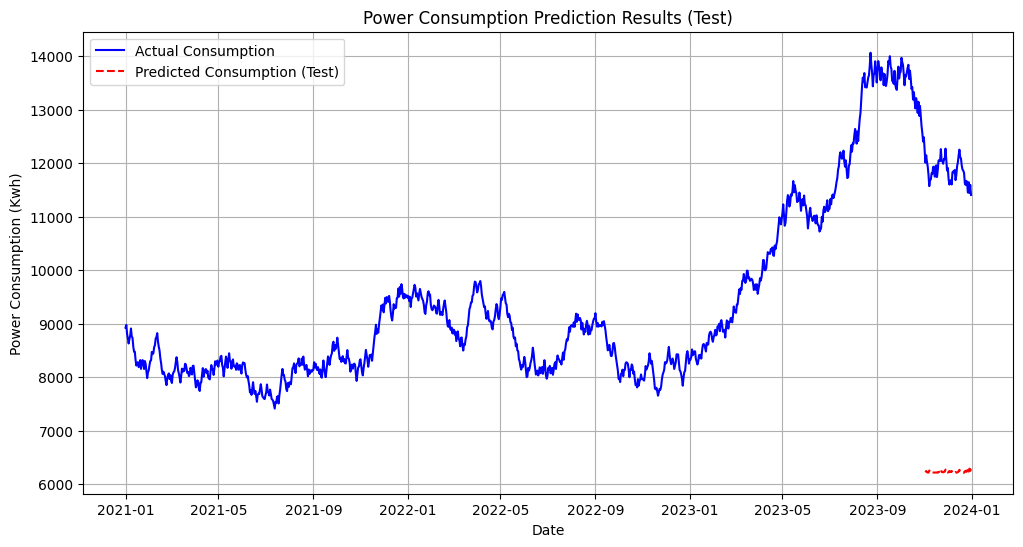

In [12]:
import autokeras as ak
import numpy as np
import pandas as pd
from datetime import datetime, timedelta
import matplotlib.pyplot as plt

# Load the data
data_with_volatility = pd.read_csv('power_consumption_data_with_volatility.csv', parse_dates=['Date'], index_col='Date')

# Feature and Target separation
X = data_with_volatility.iloc[:-1].values
y = data_with_volatility['Consumption'].shift(-1).dropna().values

# Autokeras model definition
regressor = ak.StructuredDataRegressor(max_trials=10)

# Model training
regressor.fit(X[:-60], y[:-60], epochs=20)  # Use all data except the last 60 days for training

# Get the last 60 days of the data for testing
X_test = data_with_volatility.iloc[-60:].values

# Predictions for the last 60 days
predictions_test = regressor.predict(X_test).flatten()  # Flatten to make it 1-dimensional

# Create a DataFrame with the actual and predicted values for the last 60 days
test_result = pd.DataFrame({
    'Date': data_with_volatility.index[-60:],
    'Actual Consumption': data_with_volatility['Consumption'][-60:].values,
    'Predicted Consumption': predictions_test
})

# Print the actual and predicted values for the last 60 days
print(test_result)

# Visualize the predicted consumption for the last 60 days
plt.figure(figsize=(12, 6))
plt.plot(data_with_volatility.index, data_with_volatility['Consumption'], label='Actual Consumption', color='blue')
plt.plot(test_result['Date'], test_result['Predicted Consumption'], label='Predicted Consumption (Test)', color='red', linestyle='dashed')
plt.title('Power Consumption Prediction Results (Test)')
plt.xlabel('Date')
plt.ylabel('Power Consumption (Kwh)')
plt.legend()
plt.grid(True)
plt.show()

In [14]:
import autokeras as ak
import numpy as np
import pandas as pd
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Load the data
data_with_volatility = pd.read_csv('power_consumption_data_with_volatility.csv', parse_dates=['Date'], index_col='Date')

# Feature and Target separation
X = data_with_volatility.iloc[:-1].values
y = data_with_volatility['Consumption'].shift(-1).dropna().values

# Feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Autokeras model definition with adjusted parameters
regressor = ak.StructuredDataRegressor(
    max_trials=50,
    objective="val_mean_squared_error",
    project_name="structured_data_regressor",
    overwrite=True,
    directory=".",
    metrics=["mae"],
    loss="mean_squared_error",
    seed=42,
    tuner="greedy",
    embeddings_metadata=None,
    dropout_rate=0.3,
    layers=[ak.LayerNormalization(), ak.DenseBlock(use_batchnorm=False)],
)

# Model training with scaled data
regressor.fit(X_scaled[:-60], y[:-60], epochs=20)

# Get the last 60 days of the data for testing
X_test_scaled = scaler.transform(X[-60:])

# Predictions for the last 60 days
predictions_test = regressor.predict(X_test_scaled).flatten()

# Create a DataFrame with the actual and predicted values for the last 60 days
test_result = pd.DataFrame({
    'Date': data_with_volatility.index[-60:],
    'Actual Consumption': data_with_volatility['Consumption'][-60:].values,
    'Predicted Consumption': predictions_test
})

# Print the actual and predicted values for the last 60 days
print(test_result)

# Visualize the predicted consumption for the last 60 days
plt.figure(figsize=(12, 6))
plt.plot(data_with_volatility.index, data_with_volatility['Consumption'], label='Actual Consumption', color='blue')
plt.plot(test_result['Date'], test_result['Predicted Consumption'], label='Predicted Consumption (Test)', color='red', linestyle='dashed')
plt.title('Power Consumption Prediction Results (Test)')
plt.xlabel('Date')
plt.ylabel('Power Consumption (Kwh)')
plt.legend()
plt.grid(True)
plt.show()

ValueError: Unrecognized arguments ['embeddings_metadata', 'dropout_rate', 'layers'] for `BaseTuner.__init__()`.

In [15]:
import autokeras as ak
import numpy as np
import pandas as pd
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Load the data
data_with_volatility = pd.read_csv('power_consumption_data_with_volatility.csv', parse_dates=['Date'], index_col='Date')

# Feature and Target separation
X = data_with_volatility.iloc[:-1].values
y = data_with_volatility['Consumption'].shift(-1).dropna().values

# Feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Autokeras model definition with adjusted parameters
regressor = ak.StructuredDataRegressor(
    max_trials=50,
    objective="val_mean_squared_error",
    project_name="structured_data_regressor",
    overwrite=True,
    directory=".",
    metrics=["mae"],
    loss="mean_squared_error",
    seed=42,
    tuner="greedy",
    embeddings_metadata=None,
    dropout_rate=0.3,
    # Use other available layers like DenseBlock without batch normalization
    # Replace ak.LayerNormalization() with ak.DenseBlock(use_batchnorm=False) or any other suitable layer
    layers=[ak.DenseBlock(use_batchnorm=False)],
)

# Model training with scaled data
regressor.fit(X_scaled[:-60], y[:-60], epochs=20)

# Get the last 60 days of the data for testing
X_test_scaled = scaler.transform(X[-60:])

# Predictions for the last 60 days
predictions_test = regressor.predict(X_test_scaled).flatten()

# Create a DataFrame with the actual and predicted values for the last 60 days
test_result = pd.DataFrame({
    'Date': data_with_volatility.index[-60:],
    'Actual Consumption': data_with_volatility['Consumption'][-60:].values,
    'Predicted Consumption': predictions_test
})

# Print the actual and predicted values for the last 60 days
print(test_result)

# Visualize the predicted consumption for the last 60 days
plt.figure(figsize=(12, 6))
plt.plot(data_with_volatility.index, data_with_volatility['Consumption'], label='Actual Consumption', color='blue')
plt.plot(test_result['Date'], test_result['Predicted Consumption'], label='Predicted Consumption (Test)', color='red', linestyle='dashed')
plt.title('Power Consumption Prediction Results (Test)')
plt.xlabel('Date')
plt.ylabel('Power Consumption (Kwh)')
plt.legend()
plt.grid(True)
plt.show()


ValueError: Unrecognized arguments ['embeddings_metadata', 'dropout_rate', 'layers'] for `BaseTuner.__init__()`.

Trial 50 Complete [00h 00m 01s]
val_mean_squared_error: 22868.03515625

Best val_mean_squared_error So Far: 22183.662109375
Total elapsed time: 00h 01m 04s


Epoch 1/20
33/33 [==============================] - 0s 792us/step - loss: 81970624.0000 - mean_squared_error: 81970624.0000
Epoch 2/20
33/33 [==============================] - 0s 696us/step - loss: 15431660.0000 - mean_squared_error: 15431660.0000
Epoch 3/20
33/33 [==============================] - 0s 696us/step - loss: 3700324.2500 - mean_squared_error: 3700324.2500
Epoch 4/20
33/33 [==============================] - 0s 611us/step - loss: 1351777.0000 - mean_squared_error: 1351777.0000
Epoch 5/20
33/33 [==============================] - 0s 593us/step - loss: 1231578.0000 - mean_squared_error: 1231578.0000
Epoch 6/20
33/33 [==============================] - 0s 600us/step - loss: 1428327.1250 - mean_squared_error: 1428327.1250
Epoch 7/20
33/33 [==============================] - 0s 619us/step - loss: 1557965.1250 - mean_squared_error: 1557965.1250
Epoch 8/20
33/33 [==============================] - 0s 602us/step - loss: 1714757.7500 - mean_squared_error: 1714757.7500
Epoch 9/20
33/33 [==

INFO:tensorflow:Assets written to: ./structured_data_regressor/best_model/assets


2/2 [==============================] - 0s 891us/step
         Date  Actual Consumption  Predicted Consumption
0  2023-11-02        12008.784560           12037.937500
1  2023-11-03        12148.079095           11868.048828
2  2023-11-04        12020.733992           11967.601562
3  2023-11-05        11935.998137           11876.589844
4  2023-11-06        11780.470267           11816.031250
5  2023-11-07        11569.552265           11704.880859
6  2023-11-08        11681.415053           11554.142578
7  2023-11-09        11693.603687           11634.088867
8  2023-11-10        11808.512182           11642.799805
9  2023-11-11        11797.292189           11724.920898
10 2023-11-12        11928.486119           11716.902344
11 2023-11-13        11934.802471           11810.663086
12 2023-11-14        11748.167944           11815.178711
13 2023-11-15        11749.971847           11681.796875
14 2023-11-16        11959.316698           11683.083008
15 2023-11-17        11740.875012  

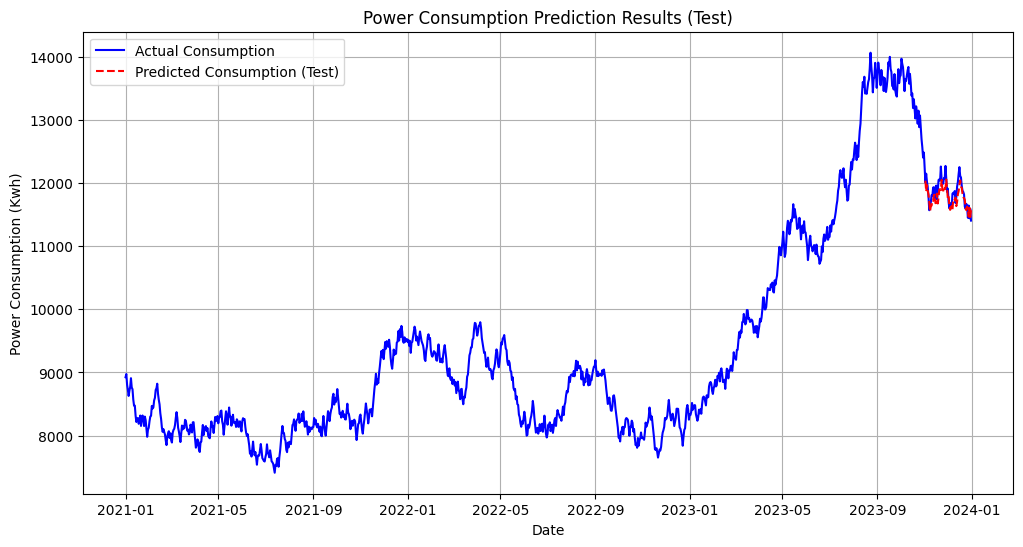

In [16]:
import autokeras as ak
import numpy as np
import pandas as pd
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Load the data
data_with_volatility = pd.read_csv('power_consumption_data_with_volatility.csv', parse_dates=['Date'], index_col='Date')

# Feature and Target separation
X = data_with_volatility.iloc[:-1].values
y = data_with_volatility['Consumption'].shift(-1).dropna().values

# Feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Autokeras model definition with adjusted parameters
regressor = ak.StructuredDataRegressor(max_trials=50, objective="val_mean_squared_error", overwrite=True, directory=".", seed=42, tuner="greedy")

# Model training with scaled data
regressor.fit(X_scaled[:-60], y[:-60], epochs=20)

# Get the last 60 days of the data for testing
X_test_scaled = scaler.transform(X[-60:])

# Predictions for the last 60 days
predictions_test = regressor.predict(X_test_scaled).flatten()

# Create a DataFrame with the actual and predicted values for the last 60 days
test_result = pd.DataFrame({
    'Date': data_with_volatility.index[-60:],
    'Actual Consumption': data_with_volatility['Consumption'][-60:].values,
    'Predicted Consumption': predictions_test
})

# Print the actual and predicted values for the last 60 days
print(test_result)

# Visualize the predicted consumption for the last 60 days
plt.figure(figsize=(12, 6))
plt.plot(data_with_volatility.index, data_with_volatility['Consumption'], label='Actual Consumption', color='blue')
plt.plot(test_result['Date'], test_result['Predicted Consumption'], label='Predicted Consumption (Test)', color='red', linestyle='dashed')
plt.title('Power Consumption Prediction Results (Test)')
plt.xlabel('Date')
plt.ylabel('Power Consumption (Kwh)')
plt.legend()
plt.grid(True)
plt.show()


In [17]:
best_model = regressor.export_model()
best_model.summary()

from tensorflow.keras.models import load_model

best_model.save("model_autokeras")

loaded_model = load_model("model_autokeras")  # , custom_objects=ak.CUSTOM_OBJECTS

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 1)]               0         
                                                                 
 multi_category_encoding (M  (None, 1)                 0         
 ultiCategoryEncoding)                                           
                                                                 
 dense (Dense)               (None, 512)               1024      
                                                                 
 re_lu (ReLU)                (None, 512)               0         
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 regression_head_1 (Dense)   (None, 1)                 513       
                                                             

INFO:tensorflow:Assets written to: model_autokeras/assets
